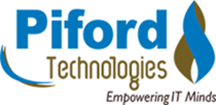

In [2]:
#!python -m pip install --upgrade pip

#!pip install tensorflow-gpu==2.6.0

#!pip install tensorflow==2.6.0

#!pip install tensorboard==2.4.1
!pip install torch  
#YOLOv5 runs on top of PyTorch, so we need to import it to the notebook

In [3]:
import torch # YOLOv5 implemented using pytorch

In [4]:
from IPython.display import Image #this is to render predictions

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [1]:
%cd yolov5

c:\Users\PC\Desktop\train_yolov5_with_custom_data\yolov5\yolov5


In [2]:
!pip install -r requirements.txt

     -------------------------------------- 182.5/182.5 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 35.6/35.6 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 167.2/167.2 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.1 MB/s eta 0:00:00
     -------------------------------------- 904.2/904.2 kB 6.3 MB/s eta 0:00:00
     ------------------------------------- 177.0/177.0 kB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 2.3 MB/s eta 0:00:00


In [6]:
!pip install wandb
!pip install Click!

ERROR: Invalid requirement: 'Click!'


# Divide the dataset in train and val folder. 

In [7]:

import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = 'C:/Users/Admin/Desktop/code_cong_ty/project/code_thay_linh/an_toan_lai_xe/Traffic-Sign-Recognition-Using-YOLO/train_yolov5_with_custom_data/yolov5/dataset/images/train'
valPath = 'C:/Users/Admin/Desktop/code_cong_ty/project/code_thay_linh/an_toan_lai_xe/Traffic-Sign-Recognition-Using-YOLO/train_yolov5_with_custom_data/yolov5/dataset/images/val'
crsPath = 'C:/Users/Admin/Desktop/code_cong_ty/project/code_thay_linh/an_toan_lai_xe/Traffic-Sign-Recognition-Using-YOLO/train_yolov5_with_custom_data/yolov5/data/ts/' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  592
Validation images are :  148


In [8]:

trainimagePath = 'C:/Users/Admin/Desktop/code_cong_ty/project/code_thay_linh/an_toan_lai_xe/Traffic-Sign-Recognition-Using-YOLO/train_yolov5_with_custom_data/yolov5/dataset/images/train'
trainlabelPath = 'C:/Users/Admin/Desktop/code_cong_ty/project/code_thay_linh/an_toan_lai_xe/Traffic-Sign-Recognition-Using-YOLO/train_yolov5_with_custom_data/yolov5/dataset/labels/train'
valimagePath = 'C:/Users/Admin/Desktop/code_cong_ty/project/code_thay_linh/an_toan_lai_xe/Traffic-Sign-Recognition-Using-YOLO/train_yolov5_with_custom_data/yolov5/dataset/images/val'
vallabelPath = 'C:/Users/Admin/Desktop/code_cong_ty/project/code_thay_linh/an_toan_lai_xe/Traffic-Sign-Recognition-Using-YOLO/train_yolov5_with_custom_data/yolov5/dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 




'C:/Users/Admin/Desktop/code_cong_ty/project/code_thay_linh/an_toan_lai_xe/Traffic-Sign-Recognition-Using-YOLO/train_yolov5_with_custom_data/yolov5/dataset/images/val\\ts'

# Create dataset.yaml

### move the dataset’s dataset.yaml file to the /content/yolov5/data directory. 
### This file contains information required by YOLO to train the model on the custom data. 

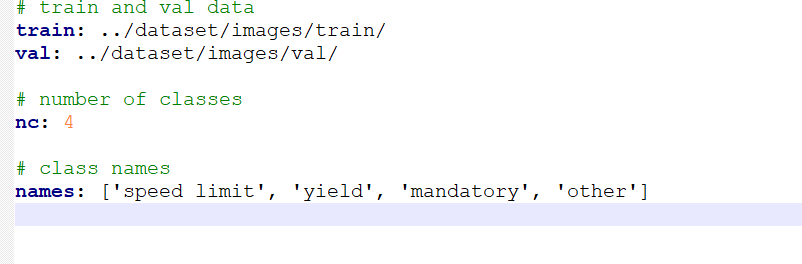

In [4]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pandas

In [5]:
!nvcc --version
!conda list cudnn
!conda list cuda
#!conda install -c conda-forge cudnn==8.2.1

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Mar_21_19:24:09_Pacific_Daylight_Time_2021
Cuda compilation tools, release 11.3, V11.3.58
Build cuda_11.3.r11.3/compiler.29745058_0
# packages in environment at C:\Users\PC\anaconda3:
#
# Name                    Version                   Build  Channel
cudnn                     8.2.1                cuda11.3_0  
# packages in environment at C:\Users\PC\anaconda3:
#
# Name                    Version                   Build  Channel
cudatoolkit               11.3.1               h59b6b97_2  


In [3]:
#!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio===0.12.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html --user
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html --user
#!pip uninstall torch torchvision torchaudio
!pip install pytorch==1.12.1 torchvision==0.13.1 torchaudio==0.12.1 cudatoolkit=11.3 -c pytorch
#!pip install tensorboard


^C


In [6]:
# import sys
# os.path.dirname(sys.executable)
import torch
print(torch.cuda.is_available())
print(torch.zeros(1).cuda())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))


True
tensor([0.], device='cuda:0')
1
0
NVIDIA GeForce RTX 2070 SUPER


In [6]:
#!pip install tensorboard
!pip install clearml
!pip install comet_ml

  Using cached PyJWT-2.4.0-py3-none-any.whl (18 kB)
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.1.0
    Uninstalling PyJWT-2.1.0:
      Successfully uninstalled PyJWT-2.1.0


  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=9752377e526eee123e2f2f174b7e0f0d9ec5b34b38f9299fa09fe0ec7dbf1155
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\4b\35\53\dfa4d3a4196794cb0a777a97c68dcf02b073d33de9c135d72a
Successfully built configobj


In [8]:
import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()  

Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  2% | 13% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  2% |  8% |


In [5]:
!python train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache
#!python train.py --data dataset.yaml --weights yolov5s.pt --img 415
#!python -m torch.distributed.run --nproc_per_node 1 --master_port 1 train.py --data dataset.yaml --weights yolov5s.pt --img 640 --device 0
#!python detect.py --weights yolov5s.pt --source 0

Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\code_cong_ty\project\code_thay_linh\an_toan_lai_xe\Traffic-Sign-Recognition-Using-YOLO\train_yolov5_with_custom_data\yolov5\yolov5\train.py", line 29, in <module>
    import torch
  File "c:\Users\Admin\anaconda3\lib\site-packages\torch\__init__.py", line 129, in <module>
    raise err
OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "c:\Users\Admin\anaconda3\lib\site-packages\torch\lib\shm.dll" or one of its dependencies.


## At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.

## Explore the metrics recorded during training, I suggest you use TensorBoard, a very interactive exploration tool:

In [7]:
%load_ext tensorboard
%tensorboard --logdir runs

## Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label

In [8]:
Image(filename='runs/train/exp13/test_batch2_pred.jpg', width=1000)


NameError: name 'Image' is not defined

Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes. 

You’ll be implementing the detect.py script with the best.pt weights and image dimensions of 416x416 pixels (it’s really important to comply with that). The results will be saved to runs/detect/exp. To display the results, run the following code:

In [13]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25
#%cd yolov5
!python detect.py --source runs/train/exp13/a.jpg --weights best.pt

detect: weights=['best.pt'], source=runs/train/exp13/a.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-27-g454dae1 Python-3.9.13 torch-1.12.1 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Traceback (most recent call last):
  File "c:\Users\PC\Desktop\train_yolov5_with_custom_data\yolov5\yolov5\yolov5\detect.py", line 261, in <module>
    main(opt)
  File "c:\Users\PC\Desktop\train_yolov5_with_custom_data\yolov5\yolov5\yolov5\detect.py", line 256, in main
    run(**vars(opt))
  File "c:\Users\PC\anaconda3\lib\site-packages\torch\autograd\grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "c:\U

In [14]:
Image(filename='runs/detect/exp4/a.jpg', width=416)


NameError: name 'Image' is not defined

In [16]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp13')  # plot results.txt as results.png

TypeError: plot_results() got an unexpected keyword argument 'save_dir'